In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')

In [3]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
print(train.isna().sum().sort_values(ascending = False))

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
print((test.isna().sum().sort_values(ascending = False)))

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


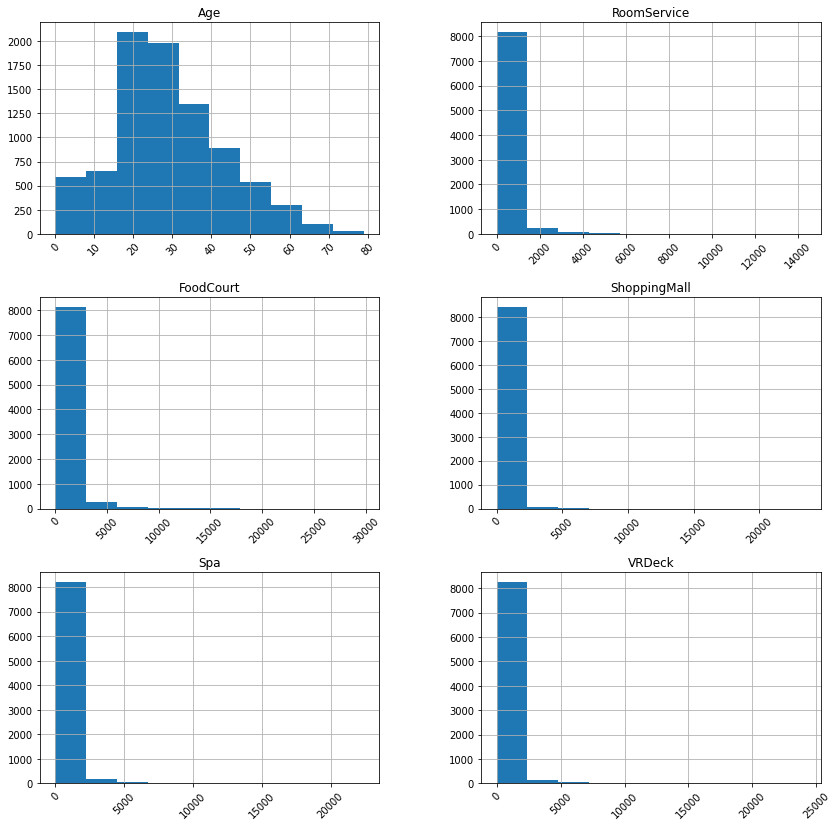

In [7]:
train.hist(figsize=(14,14), xrot=45)
plt.show()

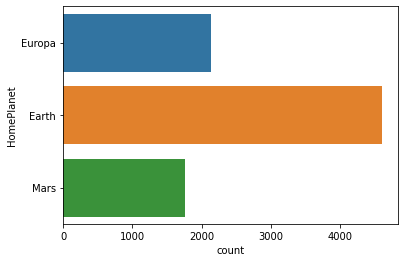

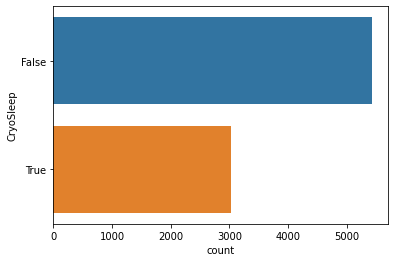

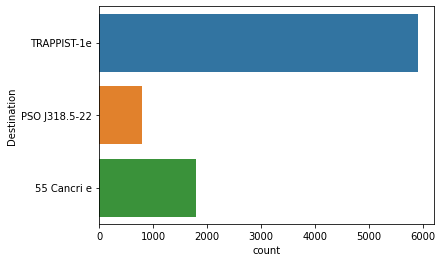

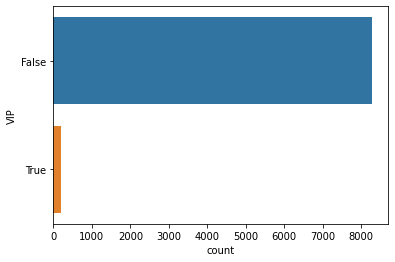

In [8]:
for column in train.select_dtypes(include='object'):
    if train[column].nunique() < 10:
        sns.countplot(y=column, data=train)
        plt.show()

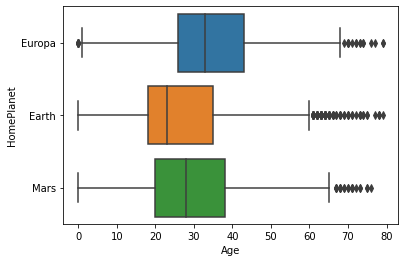

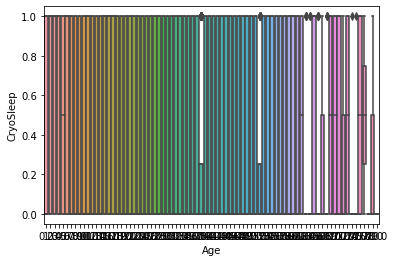

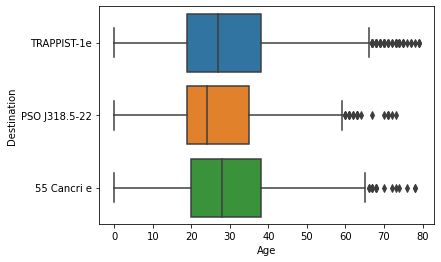

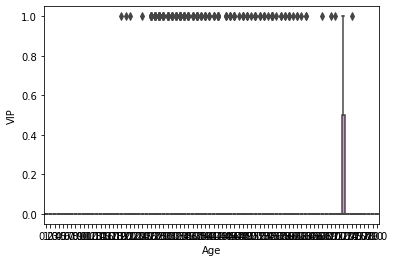

In [9]:
for column in train.select_dtypes(include='object'):
    if train[column].nunique() < 10:
        sns.boxplot(y=column, x='Age', data=train)
        plt.show()

In [10]:
for column in train.select_dtypes(include='object'):
    if train[column].nunique() < 10:
        display(train.groupby(column).mean())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,,,,,,,
Earth,26.068232,136.940209,137.228857,133.872606,142.781701,138.132933,0.423946
Europa,34.419664,145.231981,1503.212950,151.132820,848.055609,875.765998,0.658846
Mars,29.297203,552.897272,54.361999,308.445734,110.221706,47.440698,0.523024


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,,,,,,,
False,29.651319,350.146772,713.004316,270.586504,486.09294,475.716165,0.328921
True,27.405415,0.000000,0.000000,0.000000,0.00000,0.000000,0.817583


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Destination,,,,,,,
55 Cancri e,29.305776,192.818746,888.091889,157.700342,480.395230,508.556250,0.610000
PSO J318.5-22,27.529412,90.601290,122.187179,113.285347,118.001282,140.132653,0.503769
TRAPPIST-1e,28.817522,252.950752,375.916077,187.463309,283.981865,267.792250,0.471175


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
VIP,,,,,,,
False,28.639611,217.218527,426.336536,173.876298,301.711045,282.718056,0.506332
True,37.449495,473.615385,1811.393782,247.726804,760.710660,1234.856410,0.381910


In [11]:
corrs = train.corr()
corrs

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


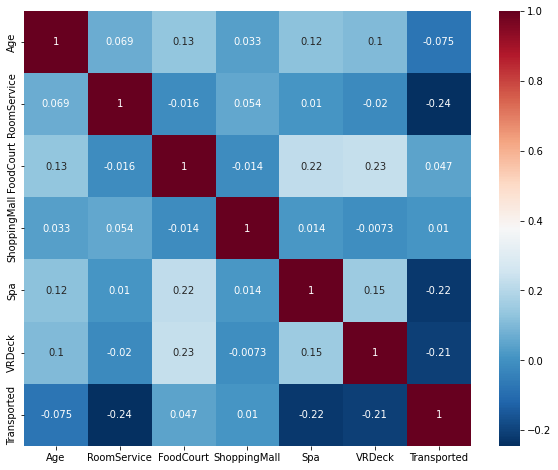

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()